In [10]:
from ESRNN.m4_data import prepare_m4_data
from ESRNN.utils_evaluation import evaluate_prediction_owa
from ESRNN.utils_evaluation import Naive2
from ESRNN import ESRNN
import os
import sys
import numpy as np
import pandas as pd
import import_ipynb
import random
import string
from datetime import datetime
from sktime.forecasting.naive import NaiveForecaster
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf
import math
from pandas import ExcelWriter
from pandas import ExcelFile
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.performance_metrics.forecasting import mase_loss
from sktime.utils.plotting.forecasting import plot_ys
from sklearn.metrics import mean_squared_error
from math import sqrt
#import fforma

#from fforma.m4_data import prepare_m4_data, seas_dict

In [11]:
data1 = pd.read_excel('C:/Users/chend/Downloads/capstone/src/Data/DATA.xlsx', sheet_name=2)
data1.head()

,Date,Russeltop200,MSCIJapan,SP500IT,SP500HealthCare,SP500Industrial
0,1996-03-19,0.977873,0.975890,0.973363,0.975480,0.980108
1,1996-03-20,0.978322,0.980040,0.947271,0.987293,0.976917
2,1996-03-21,0.979247,1.005397,0.963624,1.005727,0.977197
3,1996-03-22,0.982456,0.976213,0.983472,0.974240,0.988748
4,1996-03-25,0.979470,0.988600,0.955438,0.973929,0.977253


In [12]:
features_considered = ['Date','Russeltop200','MSCIJapan','SP500IT','SP500HealthCare','SP500Industrial']
series = data1[features_considered]
series.head()
#series.plot(subplots = True)

,Date,Russeltop200,MSCIJapan,SP500IT,SP500HealthCare,SP500Industrial
0,1996-03-19,0.977873,0.975890,0.973363,0.975480,0.980108
1,1996-03-20,0.978322,0.980040,0.947271,0.987293,0.976917
2,1996-03-21,0.979247,1.005397,0.963624,1.005727,0.977197
3,1996-03-22,0.982456,0.976213,0.983472,0.974240,0.988748
4,1996-03-25,0.979470,0.988600,0.955438,0.973929,0.977253


4900 1225


array([   1,    2,    3, ..., 1223, 1224, 1225])

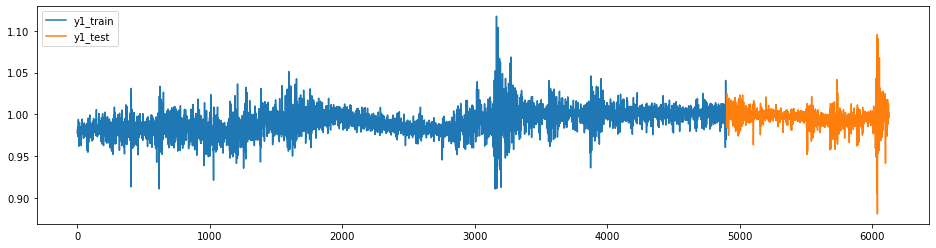

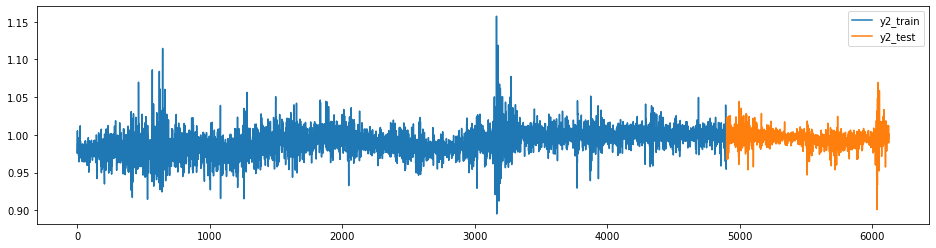

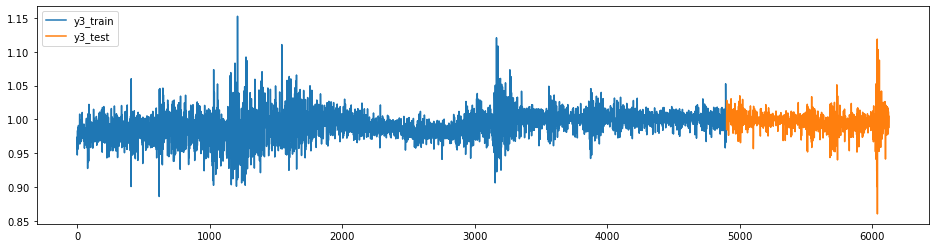

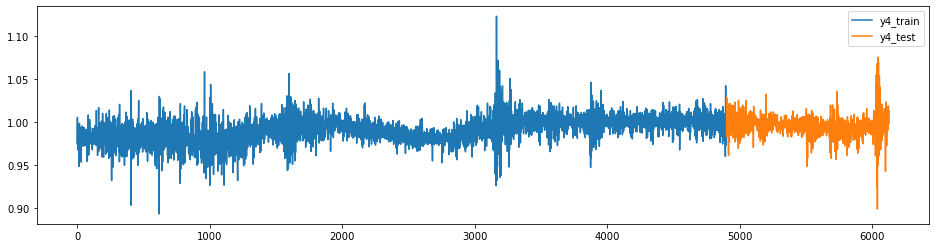

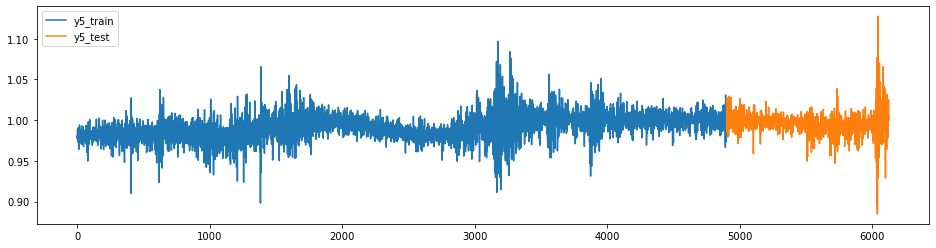

In [13]:
testsize = 0.2

y1 = series['Russeltop200']
y2 = series['MSCIJapan']
y3 = series['SP500IT']
y4 = series['SP500HealthCare']
y5 = series['SP500Industrial']
y_Date = series ['Date']
y_Date2 = pd.date_range(end = y_Date.iloc[-1], periods = len(y_Date),freq='D')
fhlength = math.floor(len(y1) * testsize)

y1_train, y1_test = temporal_train_test_split(y1, test_size=fhlength)
plot_ys(y1_train, y1_test, labels=["y1_train", "y1_test"])
print(y1_train.shape[0], y1_test.shape[0])

y2_train, y2_test = temporal_train_test_split(y2, test_size=fhlength)
plot_ys(y2_train, y2_test, labels=["y2_train", "y2_test"])

y3_train, y3_test = temporal_train_test_split(y3, test_size=fhlength)
plot_ys(y3_train, y3_test, labels=["y3_train", "y3_test"])

y4_train, y4_test = temporal_train_test_split(y4, test_size=fhlength)
plot_ys(y4_train, y4_test, labels=["y4_train", "y4_test"])

y5_train, y5_test = temporal_train_test_split(y5, test_size=fhlength)
plot_ys(y5_train, y5_test, labels=["y5_train", "y5_test"])

Date_train, Date_test = temporal_train_test_split(y_Date2, test_size=fhlength)

# Set Forecasting interval:
fh = np.arange(len(y1_test)) + 1
fh


In [14]:
forecaster = NaiveForecaster(strategy="seasonal_last",sp=252)


forecaster.fit(y1_train)
y1_pred_naive = forecaster.predict(fh)
#plot_ys(y1_train, y1_test, y1_pred_naive, labels=["y1_train", "y1_test", "y1_pred_naive"])

forecaster.fit(y2_train)
y2_pred_naive = forecaster.predict(fh)
#plot_ys(y2_train, y2_test, y2_pred_naive, labels=["y2_train", "y2_test", "y2_pred_naive"])

forecaster.fit(y3_train)
y3_pred_naive = forecaster.predict(fh)
#plot_ys(y3_train, y3_test, y3_pred_naive, labels=["y3_train", "y3_test", "y3_pred_naive"])

forecaster.fit(y4_train)
y4_pred_naive = forecaster.predict(fh)
#plot_ys(y4_train, y4_test, y4_pred_naive, labels=["y4_train", "y4_test", "y4_pred_naive"])

forecaster.fit(y5_train)
y5_pred_naive = forecaster.predict(fh)
#plot_ys(y5_train, y5_test, y5_pred_naive, labels=["y5_train", "y5_test", "y5_pred_naive"])

In [15]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_m4_data(dataset_name='Yearly',
                                                                directory = './',
                                                                num_obs=1000)

In [16]:
#y1_test_df.head()

In [17]:
#train_id = list(X_train_df['unique_id'][0:len(Date_train)])
id_form = list(X_train_df['unique_id'].unique())


In [18]:
train_id = []
test_id = []
for i in range(175):
    for j in range(28):
        iden = 'D' + str(i)
        train_id.append(iden)

for i in range(175):
    for j in range(7):
        iden = 'D' + str(i)
        test_id.append(iden)



In [235]:

data1 = {'unique_id':train_id,'ds':Date_train, 'x':['Macro']*len(Date_train)} 
data2 = {'unique_id':train_id,'ds':Date_train, 'y':y1_train} 
data3 = {'unique_id':test_id, 'ds':list(Date_test) ,'x':['Macro']*len(Date_test)} 
data4 = {'unique_id':test_id,'ds':list(Date_test), 'y':y1_test,'y_hat_naive2': y1_pred_naive} 

X1_train_df = pd.DataFrame(data1)
y1_train_df = pd.DataFrame(data2)
X1_test_df = pd.DataFrame(data3)
y1_test_df = pd.DataFrame(data4)
X1_test_df = X1_test_df.reset_index(drop = True)
y1_test_df = y1_test_df.reset_index(drop = True)
#X1_test_df.insert(1,'ds',Date_test) 

In [194]:
#len(X1_train_df.unique_id.unique())
#len(X1_test_df)
#y1_train_df.y.iloc[0] =1
#y1_train_df['unique_id'].unique() == y1_test_df['unique_id'].unique()

1225

In [207]:
#y1_test_df.y.iloc[0] = 1
#len(y1_test_df['unique_id'].unique())
#y1_test_df.tail()

,unique_id,ds,y,y_hat_naive2
1220,Y174,2020-07-13,0.988376,1.012859
1221,Y174,2020-07-14,1.012069,1.011576
1222,Y174,2020-07-15,1.005902,1.004998
1223,Y174,2020-07-16,0.995500,0.999964
1224,Y174,2020-07-17,1.002019,1.008652


In [206]:
#y1_test_df.dtypes

#np.isnan(train_id)
#temp = X1_test_df[X1_test_df['unique_id'] == 'NaN']
#train_id[-1]

unique_id               object
ds              datetime64[ns]
y                      float64
y_hat_naive2           float64
dtype: object

In [231]:
#len(X1_test_df['unique_id'].unique())
#X1_train_df['unique_id'].unique() == X1_test_df['unique_id'].unique()
#X_train_df

,unique_id,ds,x
0,Y1,1970-01-01,Macro
1,Y1,1970-01-02,Macro
2,Y1,1970-01-03,Macro
3,Y1,1970-01-04,Macro
4,Y1,1970-01-05,Macro
...,...,...,...
34876,Y999,1970-01-16,Macro
34877,Y999,1970-01-17,Macro
34878,Y999,1970-01-18,Macro
34879,Y999,1970-01-19,Macro


In [241]:
model = ESRNN(max_epochs=2, freq_of_test=5, batch_size=100, learning_rate=1e-4,frequency = 'D',
              per_series_lr_multip=0.8, lr_scheduler_step_size=10,
              lr_decay=0.1, gradient_clipping_threshold=50,
              rnn_weight_decay=0.0, level_variability_penalty=100,
              testing_percentile=20, training_percentile=80,
              ensemble=False, max_periods=25, seasonality=[1],
              input_size=4, output_size=6,
              cell_type='LSTM', state_hsize=40,
              dilations=[[1], [6]], add_nl_layer=False,
              random_seed=1, device='cpu')

In [242]:
model.fit(X1_train_df, y1_train_df, X1_test_df, y1_test_df)

=============== Training ESRNN  ===============

========= Epoch 0 finished =========
Training time: 0.23586
Training loss (80 prc): 0.10943
Testing loss  (20 prc): 0.04001
OWA: nan 
SMAPE: nan 
MASE: nan 
========= Epoch 1 finished =========
Training time: 0.24186
Training loss (80 prc): 0.10841
Train finished! 



In [204]:
# Predict on test set
X1_train_df.head()
y_hat_df = model.predict(X1_test_df)
#kk = ['Y141', 'Y183', 'Y184', 'Y105', 'Y186', 'Y118', 'Y104', 'Y107', 'Y139', 'Y179', 'Y128', 'Y143', 'Y100', 'Y152', 'Y205', 'Y165', 'Y125', 'Y137', 'Y199', 'Y167', 'Y155', 'Y151', 'Y112', 'Y12', 'Y198', 'Y11', 'Y147', 'Y182', 'Y121', 'Y16', 'Y144', 'Y20', 'Y195', 'Y153', 'Y1000', 'Y185', 'Y103', 'Y166', 'Y189', 'Y180', 'Y192', 'Y174', 'Y18', 'Y158', 'Y122', 'Y114', 'Y188', 'Y108', 'Y154', 'Y162', 'Y149', 'Y187', 'Y176', 'Y10', 'Y164', 'Y136', 'Y135', 'Y101', 'Y111', 'Y113', 'Y145', 'Y134', 'Y132', 'Y102', 'Y146', 'Y197', 'Y200', 'Y1', 'Y129', 'Y123']
y_hat_df.tail()
#len(kk)

,unique_id,ds,x,y_hat
1220,Y174,2020-07-13,Macro,NaN
1221,Y174,2020-07-14,Macro,NaN
1222,Y174,2020-07-15,Macro,NaN
1223,Y174,2020-07-16,Macro,NaN
1224,Y174,2020-07-17,Macro,NaN


In [ ]:
rms = sqrt(mean_squared_error(y_valid_df.y, y_hat_df.y))

In [4]:
# Instantiate model
#  lr_scheduler_step_size(int): this step_size is the period for each learning rate decay
rate = [1e-4, 1e-2,1]
step = [4,5,6]
def build_model(rate, step):
    model = ESRNN(max_epochs=1, freq_of_test=5, batch_size=100, learning_rate=rate,
              per_series_lr_multip=0.8, lr_scheduler_step_size=step,
              lr_decay=0.1, gradient_clipping_threshold=50,
              rnn_weight_decay=0.0, level_variability_penalty=100,
              testing_percentile=50, training_percentile=50,
              ensemble=False, max_periods=25, seasonality=[],
              input_size=4, output_size=4,
              cell_type='LSTM', state_hsize=40,
              dilations=[[1], [6]], add_nl_layer=True,
              random_seed=1, device='cpu')
    return model

In [12]:
# Fit model
# If y_test_df is provided the model
# will evaluate predictions on this set every freq_test epochs
#rmse = 9999999
#smallest = 0
#count = 0
learning = 0
lr = 0
def fit_model(x_train, y_train, x_test, y_test, rate, step, index):
    model = build_model(rate, step)
    model.fit(X_train_df, y_train_df, X_test_df, y_test_df)
    y_hat_df = model.predict(X_test_df)
    rms = sqrt(mean_squared_error(y_valid_df.y, y_hat_df.y))
    if rmse > rms:
        rmse = rms
        #smallest = count
        learning = rate
        lr = step
    return [index, learning, step, rmse]


In [9]:
# Predict on test set
#y_hat_df = model.predict(X_test_df)

In [9]:
# # Evaluate predictions
# final_owa, final_mase, final_smape = evaluate_prediction_owa(y_hat_df, y_train_df,
#                                                              X_test_df, y_test_df,
#                                                              naive2_seasonality=1)

In [11]:
# X_train_df.x

In [6]:
# def is_unique(s):
#     a = s.to_numpy() # s.values (pandas<0.24)
#     return (a[0] == a).all()

In [7]:
# is_unique(X_train_df.x)

In [8]:
# is_unique(X_test_df.x)